In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
df = pd.read_csv('wiki-RfA.csv', index_col=0, parse_dates=['Date'])
df

,Source,Target,Vote,Results,Year,Date,Comment
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit..."
...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,2003-09-02 02:51:00,Support
198271,Angela,WhisperToMe,1,1,2003,2003-11-26 23:45:00,Support.
198272,Jiang,WhisperToMe,1,1,2003,NaT,Support. --
198273,Pakaran,WhisperToMe,1,1,2003,2003-12-05 05:38:00,Support. Age has nothing to do with maturity....


In [4]:
df[df['Year'] == 2003]

,Source,Target,Vote,Results,Year,Date,Comment
198072,Cyp,168...,1,1,2003,2003-11-30 23:12:00,Support 2³&times;3&times;7... [[User:Cyp|&#922...
198073,Maximus Rex,168...,1,1,2003,2003-12-01 00:52:00,Support -- a good contributor.
198074,Cyan,168...,1,1,2003,2003-12-01 18:25:00,Support. --
198075,Angela,168...,1,1,2003,2003-12-02 04:26:00,Support.
198076,Hephaestos,168...,1,1,2003,2003-12-02 15:45:00,Support. I've never seen 168 do anything but ...
...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,2003-09-02 02:51:00,Support
198271,Angela,WhisperToMe,1,1,2003,2003-11-26 23:45:00,Support.
198272,Jiang,WhisperToMe,1,1,2003,NaT,Support. --
198273,Pakaran,WhisperToMe,1,1,2003,2003-12-05 05:38:00,Support. Age has nothing to do with maturity....


# Time series visualisation

### Handle missing data

In [5]:
voting_time = (df.groupby('Target').Date.apply(lambda x: x - x.min()).dt.total_seconds()/3600).rename('Voting_time')

# add voting time to df dataframe, merge on index
df_timeserie = df.join(voting_time.droplevel(0))
df_timeserie

,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.,0.000000
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--,1.850000
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.,0.500000
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,0.966667
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...",1.716667
...,...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,2003-09-02 02:51:00,Support,48.633333
198271,Angela,WhisperToMe,1,1,2003,2003-11-26 23:45:00,Support.,0.000000
198272,Jiang,WhisperToMe,1,1,2003,NaT,Support. --,NaN
198273,Pakaran,WhisperToMe,1,1,2003,2003-12-05 05:38:00,Support. Age has nothing to do with maturity....,197.883333


The voting_time series gives the time in minute at which each vote was cast compared to the first vote recorded for the same target (we consider this as the opening of the polls). Thus, for each target we should have a voting_time of 0.

In [6]:
# Convert Vote, Results and Year to int
df_timeserie['Vote'] = df_timeserie['Vote'].astype(int)
df_timeserie['Results'] = df_timeserie['Results'].astype(int)
df_timeserie['Year'] = df_timeserie['Year'].astype(int)

In [7]:
# Plot basic statistics
df_timeserie['Voting_time'].describe().round(2)

count    188907.00
mean       1915.66
std        5930.65
min           0.00
25%          10.43
50%          46.52
75%         157.34
max       72598.02
Name: Voting_time, dtype: float64

In [8]:
# Targets where all voting times are NaN
nan_target = set(df_timeserie.Target.unique()) - set(df_timeserie[~df_timeserie['Voting_time'].isna()].Target.unique())
print('Number of target without time data:', len(nan_target))
print('Target without time data:', nan_target)

Number of target without time data: 29
Target without time data: {'Tompagenet', 'Starblind', 'Jdforrester', 'Talrias', 'Noel', 'Sarge Baldy', 'Cyan', 'Craigy144', 'Mintguy', 'Stevertigo', 'Vsmith', 'Bishonen', 'Dori', 'wavelab1', 'Mrmewe', 'Zanimum', 'Schneelocke', 'Woohookitty', 'J.J.', 'Chadloder', 'Feco', 'Lionelisbest', 'Patrick', 'CYD', 'Delirium', 'RickK', 'Meelar', 'Fantasy', 'Olivier'}


In [9]:
# Remove targets where all voting times are NaN
df_timeserie = df_timeserie[~df_timeserie['Voting_time'].isna()]

## Distribution of the voting time

In [10]:
warnings.filterwarnings('ignore')

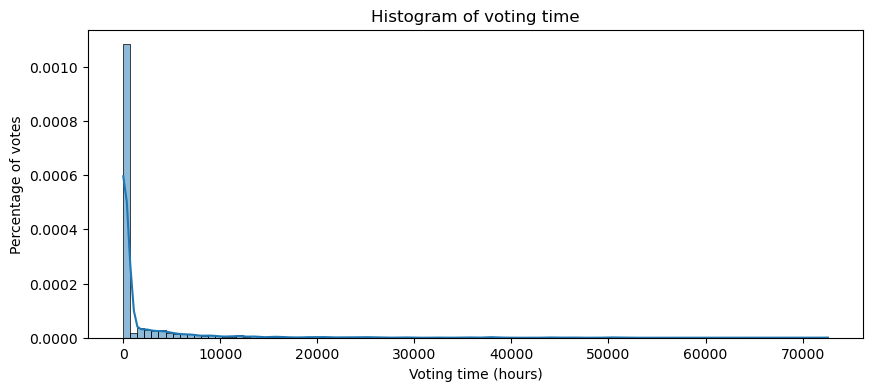

In [11]:
# Plot histogram of voting time
fig, ax = plt.subplots(figsize=(10,4))
sns.histplot(data=df_timeserie, x='Voting_time', kde=True, ax=ax, bins=100, stat='density')
ax.set_title('Histogram of voting time')
ax.set_xlabel('Voting time (hours)')
ax.set_ylabel('Percentage of votes')
plt.show()

In [12]:
# Remove the vote at time 0 minute, to plot the histogram of voting time
df_plot = df_timeserie[df_timeserie.Voting_time != 0]

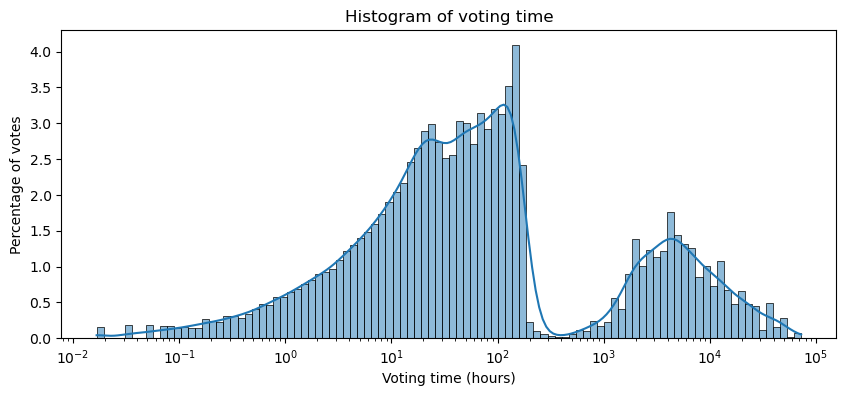

In [13]:
fig, ax = plt.subplots(figsize=(10,4))
kde = sns.histplot(data=df_plot, x='Voting_time',kde=True, ax=ax, bins=100, stat='percent', log_scale=(True, False))
ax.set_title('Histogram of voting time')
ax.set_xlabel('Voting time (hours)')
ax.set_ylabel('Percentage of votes')
plt.show()

#### Plot distribution in function of time

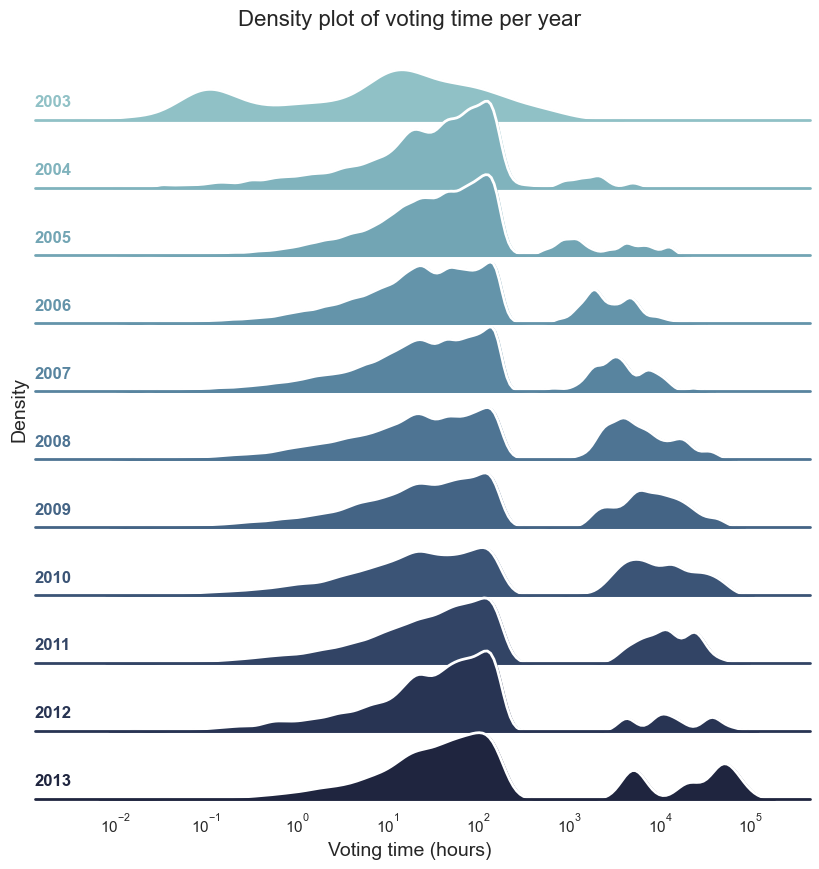

In [14]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(11, rot=-.25, light=.7)
g = sns.FacetGrid(df_plot, row='Year', hue='Year', aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, 'Voting_time', bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5, log_scale=(True, False))
g.map(sns.kdeplot, 'Voting_time', clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
      ax = plt.gca()
      ax.text(0, .2, label, fontweight="bold", color=color,
                  ha="left", va="center", transform=ax.transAxes)

g.map(label, 'Voting_time')

# Set figure properties
#g.fig.set_tight_layout(True)
g.fig.subplots_adjust(hspace=-.25)
g.fig.set_figwidth(10)
g.fig.set_figheight(10)
g.fig.suptitle('Density plot of voting time per year', fontsize=16, y=0.9)
g.fig.supylabel('Density', fontsize=14, x=0.1)
g.fig.supxlabel('Voting time (hours)', fontsize=14, y=0.05)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel='', xlabel='')
g.despine(bottom=True, left=True)

plt.show()
sns.set_theme()

We can first notice that in 2003 the voting time distribution was quite different from the other years. Indeed, the voting times were much more spread out and shifted to the left. This is probably due to the fact that at the creation of election system, the rules were not yet well established so the behaviour of the voters was not very consistent. We will start by checking if the 2003 data represents a significant part of the data. 

In [15]:
portion_2003 = df[df['Year'] == 2003].shape[0] / df.shape[0]
print(f'Portion of 2003 data: {portion_2003:.2%}')

Portion of 2003 data: 0.10%


Knowing that the amount of data for 2003 represents only 0.1% of the total data, we can consider that these data are negligible and we can remove them from the dataset. 

In [16]:
df = df[df['Year'] != 2003]
#df.to_csv('wiki-RfA.csv')
df_timeserie = df_timeserie[df_timeserie['Year'] != 2003]
df_plot = df_plot[df_plot['Year'] != 2003]

## Time interval between votes

The bimodal distribution we get when plotting on a log scale was unexpected, thus and to find an explanation to this phenomenon, we can look at the distribution of time intervals between votes:

In [17]:
# Separate the vote for a candidate by elections rounds (i.e. when there is no new vote for a target during 72 hours)
votes_gap = df_timeserie.groupby('Target').Voting_time.apply(lambda x: x.sort_values().diff())
votes_gap 

Target                  
(aeropagitica)    125967          NaN
                  125968     1.033333
                  125969     0.350000
                  126007     0.550000
                  125970     0.750000
                              ...    
Ђорђе Д. Божовић  186715     1.033333
                  186716     6.816667
                  186717    63.050000
                  186703     8.800000
                  186718    22.766667
Name: Voting_time, Length: 188777, dtype: float64

In [18]:
votes_gap.describe()

count    185347.000000
mean         20.178270
std         514.053799
min           0.000000
25%           0.200000
50%           0.700000
75%           2.225000
max       72247.600000
Name: Voting_time, dtype: float64

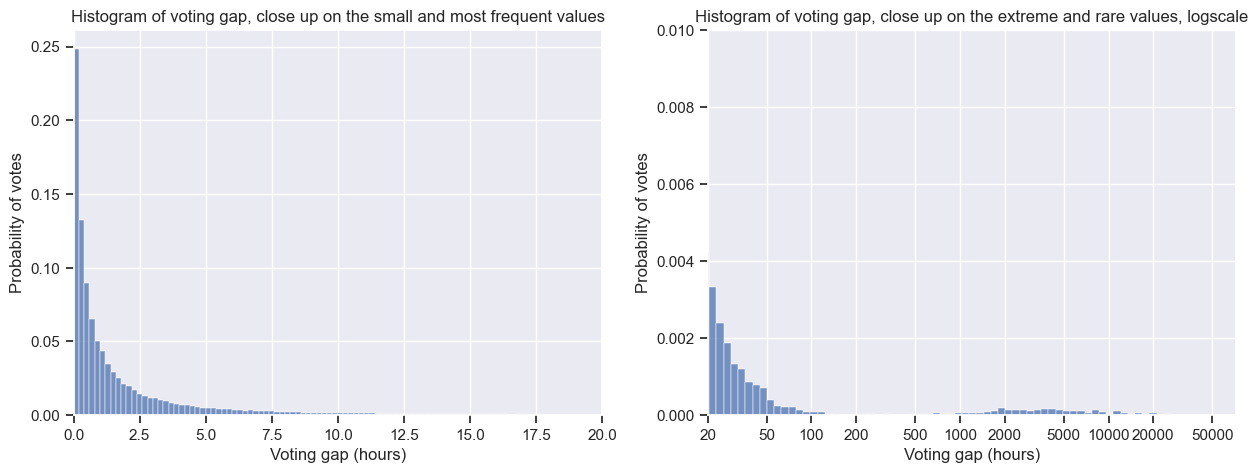

In [19]:
# Plot histogram of voting gap
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(data=votes_gap, ax=ax[0], stat='probability', bins=100, binrange=(0,20))
ax[0].set_title('Histogram of voting gap, close up on the small and most frequent values')
ax[0].set_xlabel('Voting gap (hours)')
ax[0].set_ylabel('Probability of votes')
ax[0].set_xlim(0, 20)
ax[0].tick_params(bottom=True, left=True)

sns.histplot(data=votes_gap+1, ax=ax[1], stat='probability', bins=100, log_scale=(True, False))
ax[1].set_title('Histogram of voting gap, close up on the extreme and rare values, logscale')
ax[1].set_xlabel('Voting gap (hours)')
ax[1].set_ylabel('Probability of votes')
ax[1].set_xlim(20, np.nanmax(votes_gap))
ax[1].set_ylim(0, 0.01)
ax[1].set_xticks([20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000], labels=['20', '50', '100', '200', '500', '1000', '2000', '5000', '10000', '20000', '50000']) 
ax[1].tick_params(bottom=True, left=True)

plt.show()

In [20]:
# Extract the voting gap correspong to less than 1% of the voting gap
round_gap = votes_gap[votes_gap >= votes_gap.quantile(0.99)].min()
round_gap

26.83333333333333

We can see that the distribution of the time interval between votes almost follows an exponential distribution (which is what we would expect for this type of data). However, we can see that there is an additional very small peak between 1000 and 20000 hours, which reveals the presence of multiple batches/aggregate of votes separated by a long period of time. We interpret this as different rounds of elections. Indeed, some target are not elected at the first try and they run for admin again after a certain period of time. We now want to separate the data into different rounds of elections for each target.

### Separate data into rounds of elections

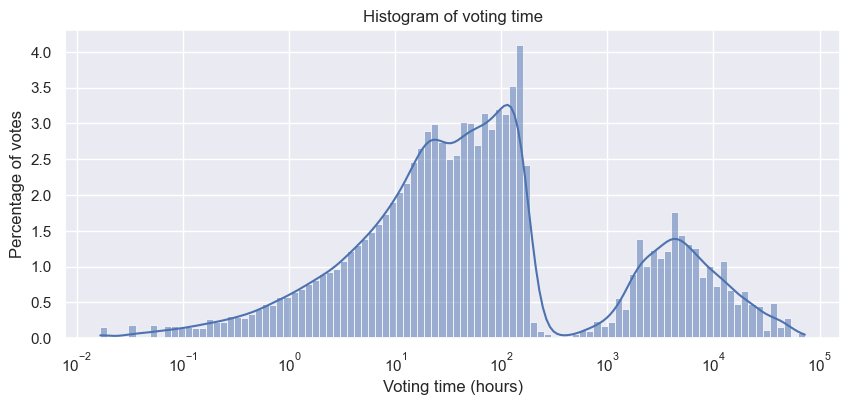

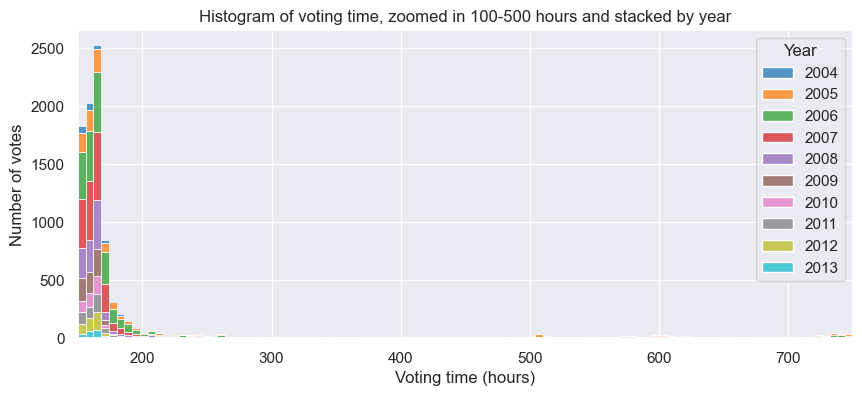

After this threshold in hours, we consider that the incoming votes are part of a new election: 391.11 hours
Percentage of votes happening at this threshold: 0.041%


In [21]:
fig, ax = plt.subplots(figsize=(10,4))
kde = sns.histplot(data=df_plot, x='Voting_time', kde=True, ax=ax, bins=100, stat='percent', log_scale=(True, False))
ax.set_title('Histogram of voting time')
ax.set_xlabel('Voting time (hours)')
ax.set_ylabel('Percentage of votes')
plt.show()

# Close up the voting time to 100-500 hours
fig, ax = plt.subplots(figsize=(10,4))
sns.histplot(data=df_plot, x='Voting_time', ax=ax, bins=100, stat='count', log_scale=(False, False), binrange=(150, 750), hue='Year', palette='tab10', multiple='stack')
ax.set_title('Histogram of voting time, zoomed in 100-500 hours and stacked by year')
ax.set_xlabel('Voting time (hours)')
ax.set_ylabel('Number of votes')
ax.set_xlim(150, 750)
plt.show()

# Fin the local minima
kde = kde.get_lines()[0].get_data()
deriv_kde_sign = np.sign(np.diff(kde[1]))
local_mins = kde[0][np.append((np.roll(deriv_kde_sign, 1) - deriv_kde_sign) != 0, False)]
y_mins = kde[1][np.append((np.roll(deriv_kde_sign, 1) - deriv_kde_sign) != 0, False)]

# only keep the minima with a y value < 0.1 and a x value is between 10 and 1e4
round_threshold = local_mins[(y_mins < 0.1) & (local_mins > 10) & (local_mins < 1e3)][0]
percent_at_threshold = y_mins[(y_mins < 0.1) & (local_mins > 10) & (local_mins < 1e3)][0]

print(f'After this threshold in hours, we consider that the incoming votes are part of a new election: {round_threshold:.2f} hours')
print(f'Percentage of votes happening at this threshold: {percent_at_threshold:.2}%')

To separate the different rounds of elections we focus on the gap between the 2 peaks in the distribution of voting time. First, we can observe that there is a huge drop in the amount of votes at around 170h which is consistent with the information we found on the Wikipedia page about the election duration being approximately 7 days (noting that this period can be prolonged in some cases). 
To find the best threshold to separate the data, we extracted the kernel density estimation of the distribution of voting time and we computed its local minimum in the gap between the 2 peaks and the corresponding voting time. We found that the best threshold to separate the data is 391h. We can now separate the data into different rounds of elections for each target using this threshold.

In [22]:
# Start a new round each time the interval between the current voting and the first voting time of the round is greater than the round threshold
def compute_rounds(data, round_threshold):
    data = data.sort_values('Voting_time')
    voting_time = data.Voting_time.values
    rounds = np.ones(len(voting_time)).astype(int)
    for i in range(1,len(voting_time)):
        if data.Results.values[i] == 1:
            # all votes after a successful vote are part of the same round
            rounds[i:] = rounds[i-1]*np.ones(len(voting_time)-i).astype(int)
            break
        if voting_time[i] > round_threshold:
            rounds[i] = rounds[i-1] + 1
            voting_time = voting_time - voting_time[i]
        else:
            rounds[i] = rounds[i-1]

    rounds = pd.Series(rounds, index=data.index).astype(int)
    return rounds

rounds = (df_timeserie.groupby('Target').apply(lambda x: compute_rounds(x, round_threshold))).rename('Round')
df_timeserie = df_timeserie.join(rounds.droplevel(0))
df_timeserie

,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.,0.000000,1
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--,1.850000,1
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.,0.500000,1
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,0.966667,1
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...",1.716667,1
...,...,...,...,...,...,...,...,...,...
198066,Lst27,Yelyos,-1,-1,2004,2004-11-16 23:57:00,Support after 1200 edits. --,47.300000,1
198068,Wolfman,Yelyos,-1,-1,2004,2004-11-19 16:05:00,Would support after a bit more editing work,111.433333,1
198069,Tuomas,Yelyos,-1,-1,2004,2004-11-20 15:24:00,The exact number of edits ought to be no obsta...,134.750000,1
198070,Improv,Yelyos,-1,-1,2004,2004-11-20 19:51:00,Not enough edits. Edits are ''necessary but no...,139.200000,1


In [24]:
df_timeserie['Round'].unique()

array([1, 2, 4, 3, 5, 7, 6])

### Update the voting time given the rounds of elections

In [23]:
# Use the round number to compute the voting time in each round (i.e. the time between the current vote and the first vote of the round)
Voting_time_round = df_timeserie.groupby(['Target', 'Round']).Voting_time.apply(lambda x: x - x.min()).rename('Voting_time_round')
df_timeserie = df_timeserie.join(Voting_time_round.droplevel([0,1]))
df_timeserie

,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round,Voting_time_round
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.,0.000000,1,0.000000
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--,1.850000,1,1.850000
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.,0.500000,1,0.500000
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,0.966667,1,0.966667
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...",1.716667,1,1.716667
...,...,...,...,...,...,...,...,...,...,...
198066,Lst27,Yelyos,-1,-1,2004,2004-11-16 23:57:00,Support after 1200 edits. --,47.300000,1,47.300000
198068,Wolfman,Yelyos,-1,-1,2004,2004-11-19 16:05:00,Would support after a bit more editing work,111.433333,1,111.433333
198069,Tuomas,Yelyos,-1,-1,2004,2004-11-20 15:24:00,The exact number of edits ought to be no obsta...,134.750000,1,134.750000
198070,Improv,Yelyos,-1,-1,2004,2004-11-20 19:51:00,Not enough edits. Edits are ''necessary but no...,139.200000,1,139.200000


In [33]:
df_timeserie.groupby(['Target', 'Round']).size().describe()

# Extract the data where the size of the group is 1
df_timeserie.groupby(['Target', 'Round']).size() == 1
df_timeserie.groupby(['Target', 'Round']).size()[df_timeserie.groupby(['Target', 'Round']).size() == 2]
for i in df_timeserie.groupby(['Target', 'Round']).size()[(df_timeserie.groupby(['Target', 'Round']).size() == 2) & (df_timeserie.groupby(['Target']).size() != 1)].index:
    to_print = df_timeserie[['Vote', 'Results', 'Date', 'Comment','Voting_time', 'Round']][df_timeserie['Target'] == i[0]]
    print(to_print)

       Vote  Results                Date Comment  Voting_time  Round
71213    -1       -1 2008-09-17 14:17:00      --          0.0      1
71214    -1       -1 2008-09-17 19:05:00     NaN          4.8      1
       Vote  Results                Date  \
44777    -1       -1 2009-06-12 20:43:00   
44779    -1       -1 2009-06-12 20:46:00   

                                                 Comment  Voting_time  Round  
44777  '''Oppose''' Here at RfA, voters look for expe...         0.00      1  
44779  '''Oppose''' Only been editing since February,...         0.05      1  
       Vote  Results                Date  \
44817    -1       -1 2009-07-14 21:01:00   
44818    -1       -1 2009-07-14 21:03:00   

                                                 Comment  Voting_time  Round  
44817  Sorry, but [[User talk:Ant2387|every single po...     0.000000      1  
44818  Per [[User:Iridescent|iride]]</font><font colo...     0.033333      1  
        Vote  Results                Date  \
187391  

The resulting rounds of elections we get using this method and threshold 

## Vote evolution through time

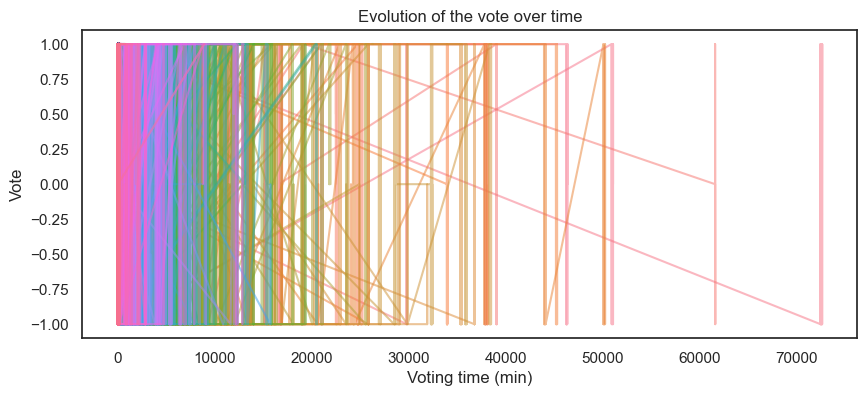

In [ ]:
# Plot the evolution of 'Vote' over 'Voting_time'
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data=df_timeserie, x='Voting_time', y='Vote', hue='Target', legend=False, ax=ax, alpha=0.5)
ax.set_title('Evolution of the vote over time')
ax.set_xlabel('Voting time (min)')
ax.set_ylabel('Vote')
plt.show()